In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
'''
folder_names: list of str. 所有文件名称（['Tail_652_1', 'Tail_652_2', ...]）
mat_paths: list of str. 所有mat路径（['D:\\_SRT\\Dataset\\Data_Download\\Tail_652_1\\652200101100441.mat', ...]）
var_names: list of str. 要处理的变量. 实际用到的变量.
'''

'''
可能用到的变量：
WS: WIND SPEED
TAS: TRUE AIRSPEED LSP
GS: GROUND SPEED LSP

WD: WIND DIRECTION TRUE
PTCH: PITCH ANGLE LSP
AOA1: ANGLE OF ATTACK 1
AOA2: ANGLE OF ATTACK 2

FPAC: FLIGHT PATH ACCELERATION
LATG: LATERAL ACCELERATION
LONG: LONGITUDINAL ACCELERATION
VRTG: VERTICAL ACCELERATION
CTAC: CROSS TRACK ACCELERATION

ALT: PRESSURE ALTITUDE LSP
ALTR: ALTITUDE RATE
'''


# 指定文件夹路径
download_path = 'D:\_SRT\Dataset\Data_Download'

# 获取文件夹下的所有文件名称
folder_names = os.listdir(download_path)#Tail_652_1,Tail_652_2,...

# 获取所有mat路径
mat_paths=[]
for folder_name in folder_names:
     folder_path=os.path.join(download_path,folder_name) # mat所在文件夹的存储路径
     mat_names=os.listdir(folder_path)
     for index, mat_name in enumerate(mat_names):
         mat_id=index # 该mat文件的序号，从0开始
         mat_paths.append(os.path.join(folder_path,mat_name))

print(len(mat_paths))


4430


In [2]:
'''
读取mat文件,进行初始采样.
'''
import scipy.io as scio
from sklearn.preprocessing import StandardScaler

#var_names=['WS','WD','TAS', 'ALTR'] # 要处理的变量
var_names=['ALT', 'ALTR', "TAS", 'GS', 'AOA1', 'AOA2', 'PTCH', 'WS', "WD", 'SAT', 'TAT', 'PI', 'PT']
indices=[i for i in range(0,3000)] # 要处理的mat文件的序号


DATA=[] # 所用到的整个数据库
for i in indices: # 遍历mat文件
    # 每轮处理一个mat
    X_this_mat=[]# 待采样的本mat中的数据
    mat_data=scio.loadmat(mat_paths[i]) # 读取到的mat数据. mat_data: dict.
    mat_data_len=mat_data['WSHR'][0][0][0].shape[0] # 本mat文件的时间步长度
    for var_name in var_names: # 遍历各变量, 每次处理本mat文件中一个变量的数据
        var_data=mat_data[var_name][0][0][0]# 读取到的本mat中某变量的数据. numpy array. Shape: (var_len, 1)
        var_rate=mat_data[var_name][0][0][1][0][0] # 该变量采样率
        var_this_mat=var_data[::var_rate, 0]
        X_this_mat.append(var_this_mat) # 把该变量的时间序列数据添加至X_this_mat(本mat的数据)中
    #X_this_mat: shape: (len(var_names), mat_data_len)
    X_this_mat=np.array(X_this_mat) # 将数据转换为numpy数组
    DATA.append(X_this_mat.T) # 把该mat的数据添加至数据库中
    if i%10==0:
        print(f'GenerateX: {i}th mat completed.')
# DATA: list of numpy arrays of shape (mat_data_len, len(var_names))
print('DATA[5].shape: ', DATA[5].shape)

GenerateX: 0th mat completed.
GenerateX: 10th mat completed.
GenerateX: 20th mat completed.
GenerateX: 30th mat completed.
GenerateX: 40th mat completed.
GenerateX: 50th mat completed.
GenerateX: 60th mat completed.
GenerateX: 70th mat completed.
GenerateX: 80th mat completed.
GenerateX: 90th mat completed.
GenerateX: 100th mat completed.
GenerateX: 110th mat completed.
GenerateX: 120th mat completed.
GenerateX: 130th mat completed.
GenerateX: 140th mat completed.
GenerateX: 150th mat completed.
GenerateX: 160th mat completed.
GenerateX: 170th mat completed.
GenerateX: 180th mat completed.
GenerateX: 190th mat completed.
GenerateX: 200th mat completed.
GenerateX: 210th mat completed.
GenerateX: 220th mat completed.
GenerateX: 230th mat completed.
GenerateX: 240th mat completed.
GenerateX: 250th mat completed.
GenerateX: 260th mat completed.
GenerateX: 270th mat completed.
GenerateX: 280th mat completed.
GenerateX: 290th mat completed.
GenerateX: 300th mat completed.
GenerateX: 310th ma

In [3]:
# 标准归一化
var_sum=np.zeros((len(var_names)))
var_mean=np.zeros((len(var_names)))
var_sum2=np.zeros((len(var_names)))
var_std_dev=np.zeros((len(var_names)))
count=0 # 总时间长度

# 计算各变量均值
for mat_data in DATA:
    # mat_data: numpy array. Shape: (mat_data_len, len(var_names))
    for i in range(mat_data.shape[0]):
        var_sum+=mat_data[i]
        count+=1
var_mean=var_sum/count

# 计算各变量方差
for mat_data in DATA:
    # mat_data: numpy array. Shape: (mat_data_len, len(var_names))
    for i in range(mat_data.shape[0]):
        var_sum2+=(mat_data[i]-var_mean)**2
var_std_dev=np.sqrt(var_sum2/count)

# 转化数据
for mat_data in DATA:
    # mat_data: numpy array. Shape: (mat_data_len, len(var_names))
    for i in range(mat_data.shape[0]):
        mat_data[i]=(mat_data[i]-var_mean)/var_std_dev

print('var_mean: ', var_mean)
print('var_std_dev: ', var_std_dev)

var_mean:  [ 1.44211748e+04 -7.98571811e+00  2.62168754e+02  2.55675378e+02
 -2.43329075e+00 -2.56704563e+00  2.17767321e+00  3.64243987e+01
 -5.20448278e+01 -9.18415184e+00  3.74458909e+00  8.45257972e+01
  7.21723100e+02]
var_std_dev:  [1.16731888e+04 8.97861274e+02 1.69296987e+02 1.67160195e+02
 3.41171789e+00 3.92132559e+00 2.54775978e+00 3.20945701e+01
 7.33448915e+01 2.34921276e+01 1.58855616e+01 5.51380821e+01
 2.32881413e+02]


In [4]:
'''
根据采样出的数据库构建用于训练的数据集
X_grouped: list of(list of (input_length,len(var_names)) numpy array).
'''

input_length=50 # 训练时序预测模型时输入的长度
output_length=10 # 训练时序预测模型时输出(预测)的长度
X_grouped=[]
Y_grouped=[]
for DATA_i in DATA: # DATA_i: numpy array. Shape: (mat_data_len, len(var_names))
    DATA_i_length=DATA_i.shape[0]
    X_i=[]
    Y_i=[]
    for i in range(0, DATA_i_length-input_length-output_length, input_length):
        X_i.append(DATA_i[i:i+input_length,:])
        Y_i.append(DATA_i[i+input_length:i+input_length+output_length,:])
    X_grouped.append(X_i)
    Y_grouped.append(Y_i)

print('len(X_grouped):', len(X_grouped))
print(X_grouped[10][2].shape)

len(X_grouped): 3000
(50, 13)


In [5]:
# 分割训练集
test_proportion=0.2
split_index=int(len(X_grouped)*test_proportion)

# split_index以后的mat作为训练集。暂不组建测试集。
X_grouped_train=X_grouped[split_index:]
Y_grouped_train=Y_grouped[split_index:]

X_train=[]
Y_train=[]

for X_i in X_grouped_train:
    for X_ij in X_i:
        X_train.append(X_ij)
for Y_i in Y_grouped_train:
    for Y_ij in Y_i:
        Y_train.append(Y_ij)

X_train=np.array(X_train)
Y_train=np.array(Y_train)
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)

X_train shape:  (241318, 50, 13)
Y_train shape:  (241318, 10, 13)


In [6]:
%%capture --no-display 
# To disable unnecessary warnings
import keras

In [7]:
# hyperparameters
sequence_length=input_length # 时序预测模型的输入序列长度
prediction_length=output_length # 时序预测模型的输出序列长度
sequence_channels=len(var_names) # 时序预测模型的通道(变量)个数
batch_size=100

In [8]:
'''
A neural network model.
Input: (batch_size, sequence_length, sequence_channels).
Output: (batch_size, prediction_length, sequence_channels).
'''


CNN=keras.models.Sequential([
    keras.layers.Input(batch_shape=(batch_size, sequence_length, sequence_channels)),
    
    keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding='valid'),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    
    keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='valid'),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    
    keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='valid'),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling1D(pool_size=3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(prediction_length*sequence_channels),
    #keras.layers.Activation('relu'),
    keras.layers.Reshape((prediction_length,sequence_channels))
])

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (100, 48, 16)             640       
                                                                 
 activation (Activation)     (100, 48, 16)             0         
                                                                 
 max_pooling1d (MaxPooling1  (100, 24, 16)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (100, 22, 32)             1568      
                                                                 
 activation_1 (Activation)   (100, 22, 32)             0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (100, 11, 32)             0         
 g1D)                                                   

In [9]:
CNN.compile(
            loss='mse',
            optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
            )
CNN_history=CNN.fit(
            X_train,Y_train,
            batch_size=batch_size,
            shuffle=True,
            epochs=50,
            verbose=2,
            validation_split=0.2
           )

Epoch 1/50
1931/1931 - 6s - loss: 1.2559 - val_loss: 0.0784 - 6s/epoch - 3ms/step
Epoch 2/50
1931/1931 - 5s - loss: 0.4876 - val_loss: 0.0605 - 5s/epoch - 3ms/step
Epoch 3/50
1931/1931 - 5s - loss: 0.5882 - val_loss: 0.0512 - 5s/epoch - 3ms/step
Epoch 4/50
1931/1931 - 5s - loss: 0.4741 - val_loss: 0.0440 - 5s/epoch - 3ms/step
Epoch 5/50
1931/1931 - 5s - loss: 0.2159 - val_loss: 0.0381 - 5s/epoch - 3ms/step
Epoch 6/50
1931/1931 - 5s - loss: 0.4701 - val_loss: 0.0355 - 5s/epoch - 3ms/step
Epoch 7/50
1931/1931 - 5s - loss: 0.2004 - val_loss: 0.0328 - 5s/epoch - 3ms/step
Epoch 8/50
1931/1931 - 5s - loss: 1.3841 - val_loss: 0.0455 - 5s/epoch - 3ms/step
Epoch 9/50
1931/1931 - 5s - loss: 0.2312 - val_loss: 0.0377 - 5s/epoch - 3ms/step
Epoch 10/50
1931/1931 - 5s - loss: 0.3561 - val_loss: 0.0355 - 5s/epoch - 3ms/step
Epoch 11/50
1931/1931 - 5s - loss: 0.5178 - val_loss: 0.0320 - 5s/epoch - 3ms/step
Epoch 12/50
1931/1931 - 5s - loss: 0.4553 - val_loss: 0.0366 - 5s/epoch - 3ms/step
Epoch 13/50
1

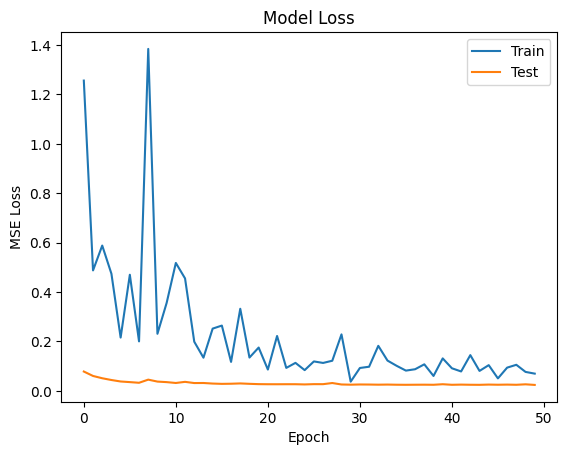

In [10]:
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

91/91 [==============================] - 0s 947us/step
X_to_predict shape:  (91, 50, 13)
Y_predict shape:  (91, 10, 13)
Y_to_predict shape:  (91, 10, 13)


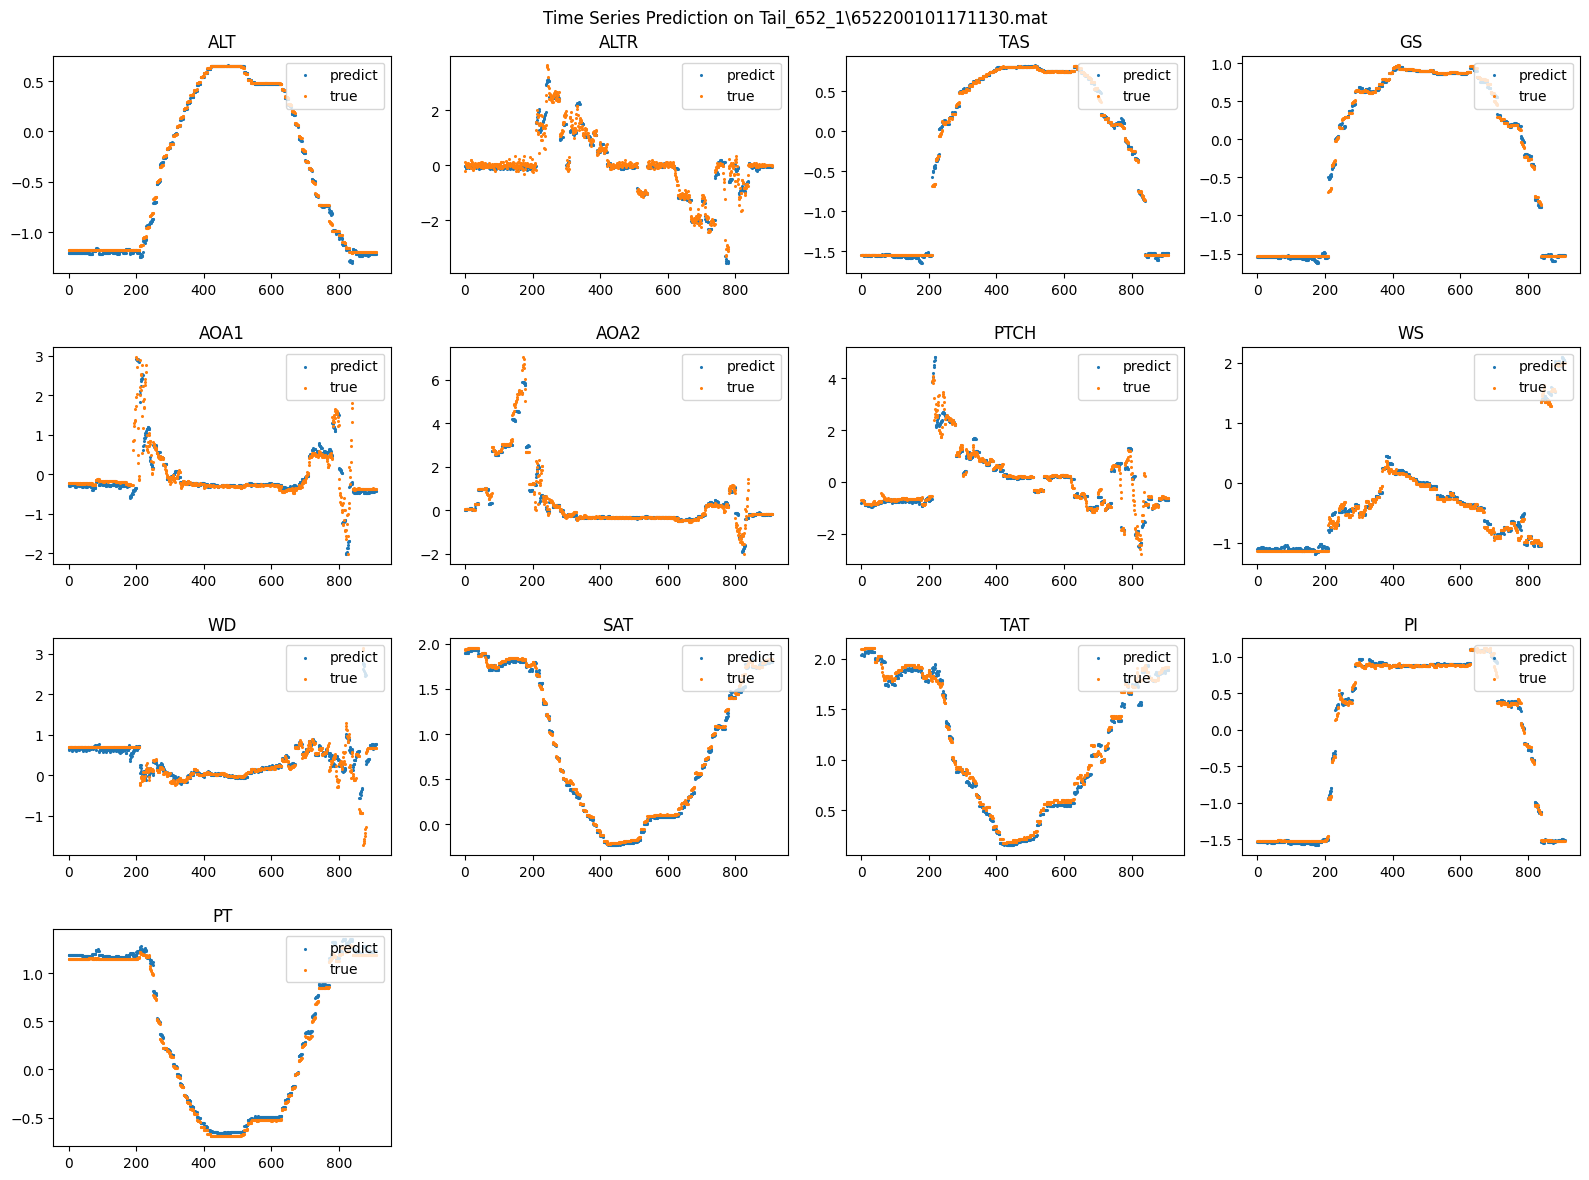

In [11]:

iii=43 # 要在某个mat文件上做预测,选中mat编号(iii)（建议落在测试集对应的编号范围内）

X_to_predict=[] # 作为输入的真实数据
Y_to_predict=[] # 待预测的真实数据
for i in range(len(X_grouped[iii])):
    X_to_predict.append(X_grouped[iii][i])
X_to_predict=np.array(X_to_predict) # X_to_predict: numpy array. Shape: (num_batches, sequence_length, sequence_channels)

for i in range(len(Y_grouped[iii])):
    Y_to_predict.append(Y_grouped[iii][i])
Y_to_predict=np.array(Y_to_predict) # Y_to_predict: numpy array. Shape: (num_batches, prediction_length, sequence_channels)

Y_predict=CNN.predict(X_to_predict, batch_size=1) # 根据X_to_predict预测到的数据

print('X_to_predict shape: ', X_to_predict.shape)
print('Y_predict shape: ', Y_predict.shape)
print('Y_to_predict shape: ', Y_to_predict.shape)


Y_predict=Y_predict.reshape(-1,sequence_channels)
Y_to_predict=Y_to_predict.reshape(-1,sequence_channels)


plt.figure(figsize=(16,12))
plt.suptitle('Time Series Prediction on {}'.format(mat_paths[iii][-30:]))
for var_name in var_names:
    var_idx=var_names.index(var_name)
    plt.subplot(4, 4, var_idx+1)
    '''
    plt.plot(Y_predict[:,var_idx], alpha=0.9)
    plt.plot(Y_to_predict[:,var_idx], alpha=0.6)
    '''
    plt.scatter(range(Y_predict[:,var_idx].shape[0]), Y_predict[:,var_idx], s=1.5)
    plt.scatter(range(Y_to_predict[:,var_idx].shape[0]), Y_to_predict[:,var_idx], s=1.5)
    
    plt.legend(['predict', 'true'], loc='upper right')
    plt.title(var_name)
plt.tight_layout(h_pad=2)
#plt.savefig("D:\\_SRT\\Dataset\\Result\\20240321\\CNN_prediction_fig1.png", bbox_inches='tight')
plt.show()

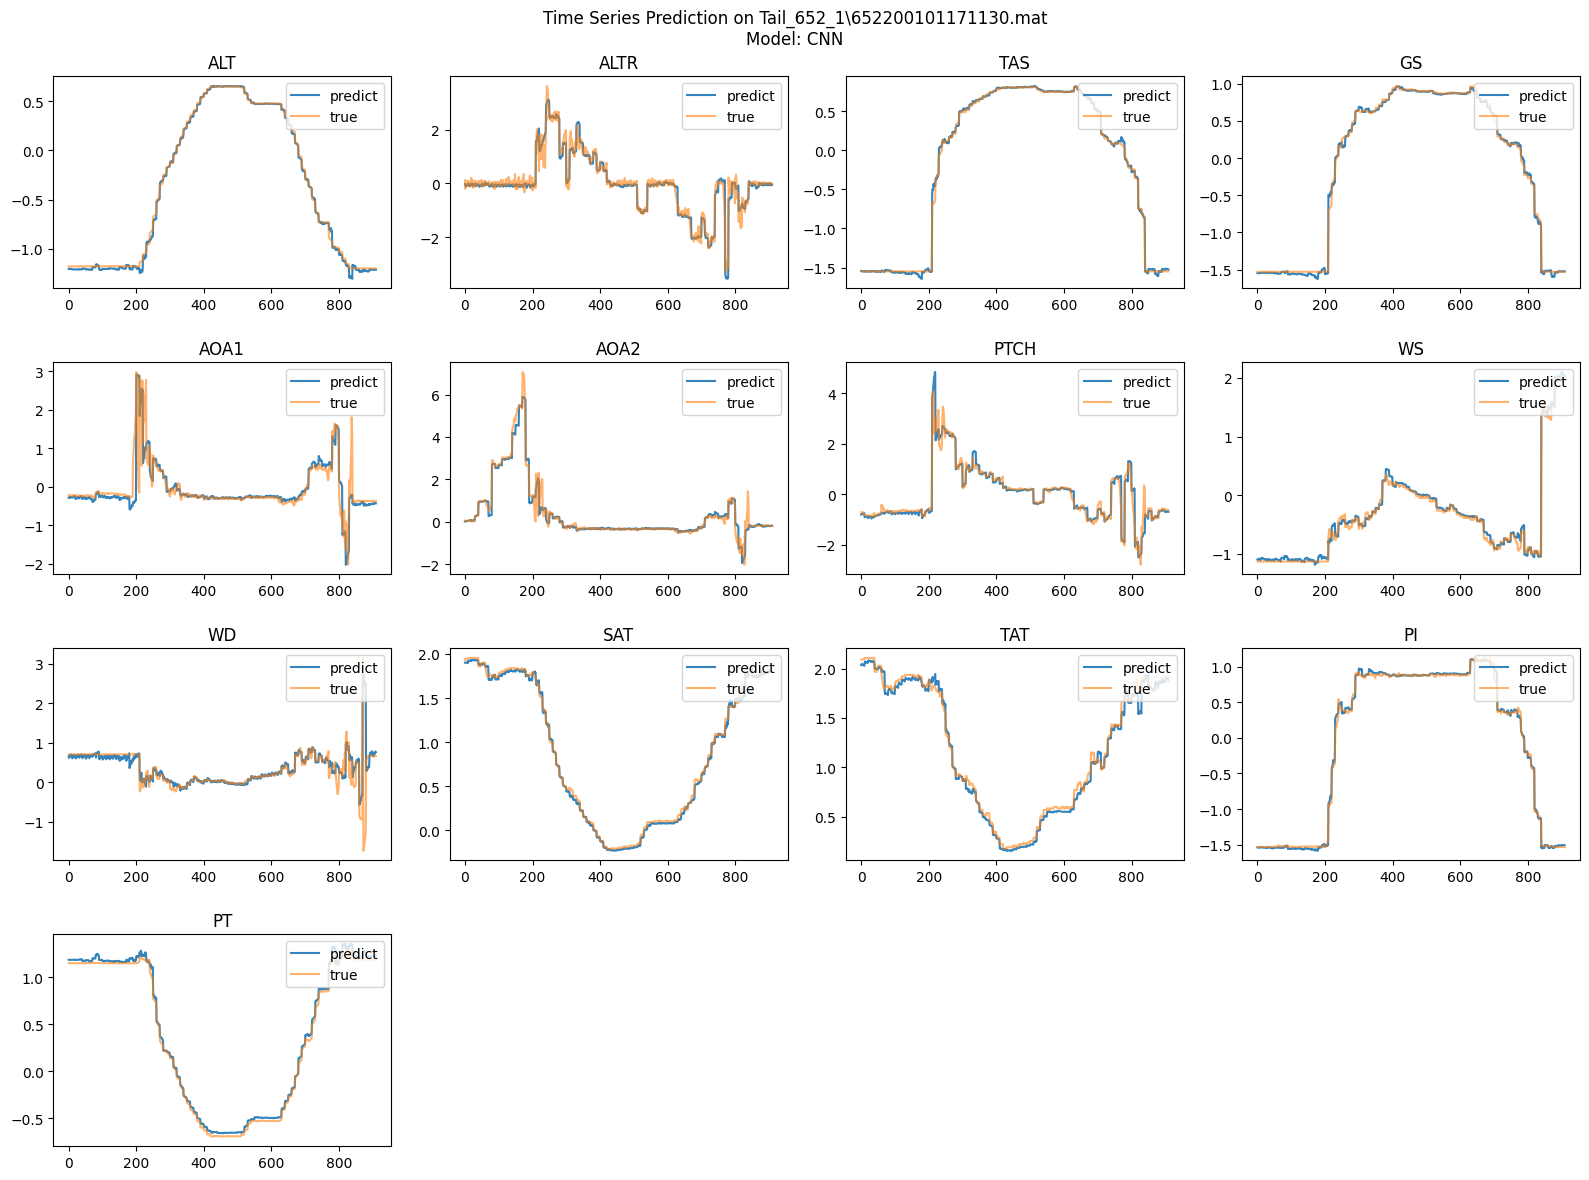

In [12]:
plt.figure(figsize=(16,12))
plt.suptitle('Time Series Prediction on {}\nModel: CNN'.format(mat_paths[iii][-30:]))
for var_name in var_names:
    var_idx=var_names.index(var_name)
    plt.subplot(4, 4, var_idx+1)
    plt.plot(Y_predict[:,var_idx], alpha=0.9)
    plt.plot(Y_to_predict[:,var_idx], alpha=0.6)
    '''
    plt.scatter(range(Y_predict[:,var_idx].shape[0]), Y_predict[:,var_idx], s=1.5)
    plt.scatter(range(Y_to_predict[:,var_idx].shape[0]), Y_to_predict[:,var_idx], s=1.5)
    '''
    plt.legend(['predict', 'true'], loc='upper right')
    plt.title(var_name)
plt.tight_layout(h_pad=2)
#plt.savefig("D:\\_SRT\\Dataset\\Result\\20240325\\CNN_prediction_fig1.png", bbox_inches='tight')
plt.show()